# Seasonal Mean Response
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [1]:
%matplotlib notebook
!date

import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth, yticks2lat
import geoxarray

Tue May 22 15:13:48 EDT 2018
[Start] matplotlib settings: ####################
Python: 3.6.5
matplotlib: 2.2.2 backend nbAgg
interactive = True
figure.max_open_warning = 50
hatch.linewidth = 0.5
hatch.color = gray
legend.frameon = False
savefig.bbox = tight
savefig.format = pdf
[End] matplotlib settings. ####################


In [2]:
# parameters
data_names = ['netrad_toa', 't_surf', 'precip']
figname = f'fig_seasonalMean_DJF.pdf'
prcp_scale = 3600 * 24

### Agung data

In [21]:
# Agung data
year_volc = 1963
season = slice(f'{year_volc}-12', f'{year_volc+1}-02')
daas_agung = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_agung import open_data as get_volcano
    volcano_name = 'Agung'
    year_volcano = 1963
    ens = range(1,31)
    nbname = 'volcano_impact_on_climate_agung.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
    
    daa = daa.sel(time=season).mean('time') # seasonal mean
    tt, pp = ttest_1samp(daa, 0)
    daa = daa.mean('en').load()
    pvalue = xr.DataArray(pp, dims=daa.dims, coords=[daa[dim] for dim in list(daa.dims)])
        
    daas_agung[data_name] = dict()
    daas_agung[data_name]['daa'] = daa
    daas_agung[data_name]['pvalue'] = pvalue


Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.nc


### StMaria data

In [22]:
# St Maria data
year_volc = 1902
season = slice(f'{year_volc}-12', f'{year_volc+1}-02')
daas_stmaria = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_stmaria import open_data as get_volcano
    volcano_name = 'StMaria'
    year_volcano = 1902
    ens = range(1,30+1)
    nbname = 'volcano_impact_on_climate_stmaria.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
    
    daa = daa.sel(time=season).mean('time') # zonal mean
    tt, pp = ttest_1samp(daa, 0)
    daa = daa.mean('en').load()
    pvalue = xr.DataArray(pp, dims=daa.dims, coords=[daa[dim] for dim in list(daa.dims)])
        
    daas_stmaria[data_name] = dict()
    daas_stmaria[data_name]['daa'] = daa
    daas_stmaria[data_name]['pvalue'] = pvalue

Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.nc


### Plot

<IPython.core.display.Javascript object>


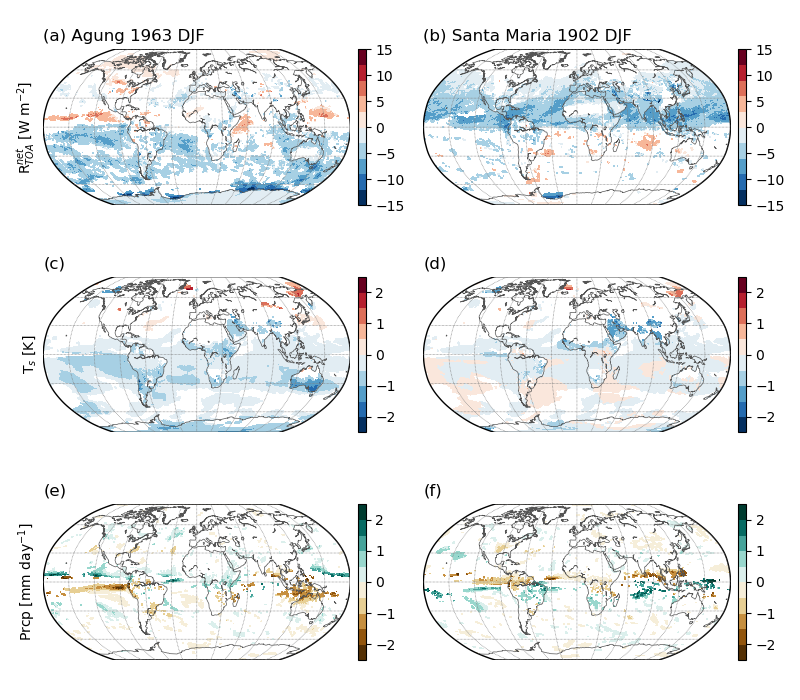

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.


In [23]:
# plot
rcParams['hatch.color'] = 'gray'
hatch_pattern = ['.....']
lon_0 = 0
proj = 'robin'

fig, axes = plt.subplots(3,2,figsize=(8,7), sharey='row', sharex='col')
# ############
plt.sca(axes[0,0])
data_name = 'netrad_toa'

daa = daas_agung[data_name]['daa'] # 
pvalue = daas_agung[data_name]['pvalue']
# daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=10, proj=proj)
daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=np.arange(-15,15+.1,3), proj=proj)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.title('(a) Agung 1963 DJF', loc='left')
plt.ylabel('R$^{net}_{TOA}$ [W m$^{-2}$]')

# ############
plt.sca(axes[0,1])
data_name = 'netrad_toa'

daa = daas_stmaria[data_name]['daa'] # 
pvalue = daas_stmaria[data_name]['pvalue']
# daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=10, proj=proj)
daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=np.arange(-15,15+.1,3), proj=proj)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.title('(b) Santa Maria 1902 DJF', loc='left')

# ############
plt.sca(axes[1,0])
data_name = 't_surf'

daa = daas_agung[data_name]['daa'] # 
pvalue = daas_agung[data_name]['pvalue']
# daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=10, proj=proj)
daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=np.arange(-2.5,2.5+.01,.5), proj=proj)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.ylabel('T$_s$ [K]')
plt.title('(c)', loc='left')

# ############
plt.sca(axes[1,1])
data_name = 't_surf'

daa = daas_stmaria[data_name]['daa'] # 
pvalue = daas_stmaria[data_name]['pvalue']
pvalue = daas_agung[data_name]['pvalue']
# daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=10, proj=proj)
daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=np.arange(-2.5,2.5+.01,.5), proj=proj)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)
plt.title('(d)', loc='left')

# ############
plt.sca(axes[2,0])
data_name = 'precip'

daa = daas_agung[data_name]['daa'] # 
pvalue = daas_agung[data_name]['pvalue']
# daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=10, cmap='BrBG', proj=proj)
daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=np.arange(-2.5,2.5+.01,0.5), cmap='BrBG', proj=proj)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.ylabel('Prcp [mm day$^{-1}$]')
plt.title('(e)', loc='left')

# ############
plt.sca(axes[2,1])
data_name = 'precip'

daa = daas_stmaria[data_name]['daa'] # 
pvalue = daas_stmaria[data_name]['pvalue']
# daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=10, cmap='BrBG', proj=proj)
daa.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=np.arange(-2.5,2.5+.01,0.5), cmap='BrBG', proj=proj)
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)
plt.title('(f)', loc='left')


plt.tight_layout()
plt.savefig(figname)